<h1> Indian Startup Funding </h1>

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from utils import *

In [3]:
ds = pd.read_csv('startup.csv')
ds.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [139]:
ds.shape

(2372, 10)

<h3> Funding with respect to cities </h3>

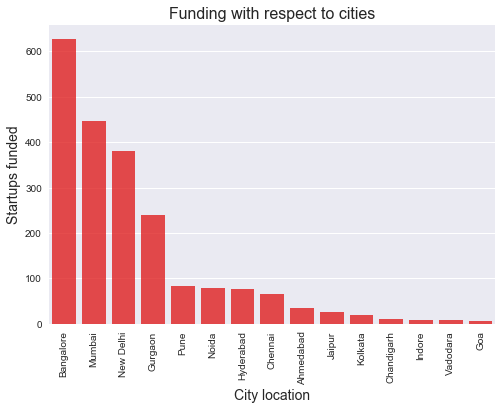

In [74]:
city = ds['CityLocation'].value_counts()[:15]
sns.barplot(city.index, city.values, alpha=0.8, color="red")
plt.xticks(rotation='vertical')
plt.xlabel('City location', fontsize=14)
plt.ylabel('Startups funded', fontsize=14)
plt.title("Funding with respect to cities", fontsize=16)
plt.show()

<p>Based on the plot it is safe to assume that bangalore is a major startup hub in India followed by Mumbai and New Delhi<p>
<p> Bangalore has funded more than 600 startups and would be a favorable choice for startups to acquire funding <p>

<h3> Funding with respect to the Industry </h3>

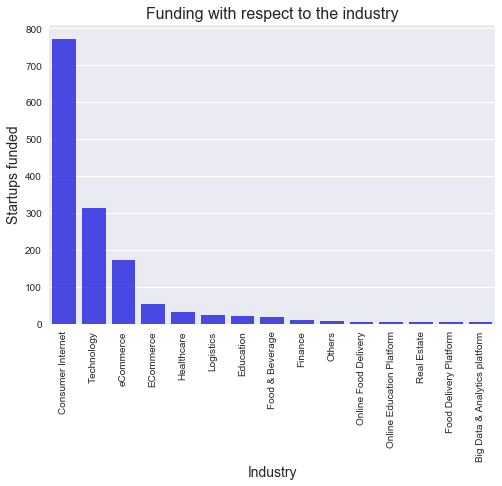

In [73]:
city = ds['IndustryVertical'].value_counts()[:15]
sns.barplot(city.index, city.values, alpha=0.8, color="blue")
plt.xticks(rotation='vertical')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Startups funded', fontsize=14)
plt.title("Funding with respect to the industry", fontsize=16)
plt.show()

<p> Consumer Internet based startups have acquired the most funding from investors followed by technology ,e-commerce and healthcare<p>
<p> Personally I am amazed by this trend as I have always assumed that there are more startups focussing on Machine learning, Big data analytics, Artificial intelligence and Blockchains<p> 

In [70]:
inv = ds['InvestorsName'].value_counts()
x = inv.values
np.where(x>=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),)

<p> Only the first 10 investors are funding more than or equal to 10 startups <p>

<h3> Funding with respect to the Investors </h3>

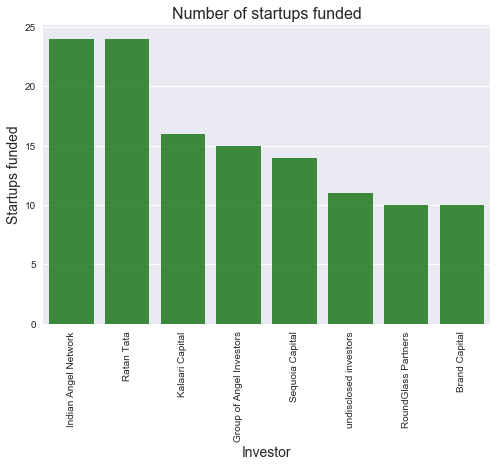

In [79]:
inv = ds['InvestorsName'].value_counts()[2:10]
sns.barplot(inv.index, inv.values, alpha=0.8, color="green")
plt.xticks(rotation='vertical')
plt.xlabel('Investor', fontsize=14)
plt.ylabel('Startups funded', fontsize=14)
plt.title("Number of startups funded", fontsize=16)
plt.show()

Indian angel network and Ratan Tata are the top investors followed by Kalaari capital

In [124]:
#I had used replace to add the blankspaces in investment type
typ = ds['InvestmentType'].value_counts()
typ

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64

<h3> Funding with respect to the Type of Investment </h3>

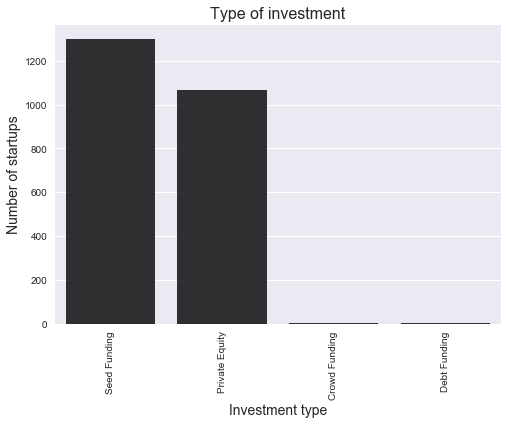

In [134]:
sns.barplot(typ.index, typ.values, alpha=0.8, color="black")
plt.xticks(rotation='vertical')
plt.xlabel('Investment type', fontsize=14)
plt.ylabel('Number of startups', fontsize=14)
plt.title("Type of investment", fontsize=16)
plt.show()

For most of the investors **Seed funding** is the favored kind of investment followed by private equity

In [190]:
amt = ds['AmountInUSD']
amt

0        1,300,000
1              NaN
2              NaN
3          500,000
4          850,000
5        1,000,000
6        2,600,000
7       20,000,000
8        8,500,000
9       12,000,000
10       1,000,000
11             NaN
12             NaN
13       1,000,000
14             NaN
15       3,000,000
16       2,250,000
17         464,000
18             NaN
19      18,500,000
20             NaN
21             NaN
22             NaN
23         540,000
24       1,700,000
25       2,000,000
26       4,000,000
27             NaN
28             NaN
29             NaN
           ...    
2342       330,000
2343           NaN
2344       200,000
2345        16,000
2346        16,000
2347        16,000
2348        16,000
2349        16,000
2350    11,000,000
2351           NaN
2352       200,000
2353    14,750,000
2354       325,000
2355           NaN
2356     3,250,000
2357       200,000
2358           NaN
2359           NaN
2360    56,000,000
2361    31,000,000
2362     1,500,000
2363        

We use log to make the distribution more analyzable

In [196]:
data = ds["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

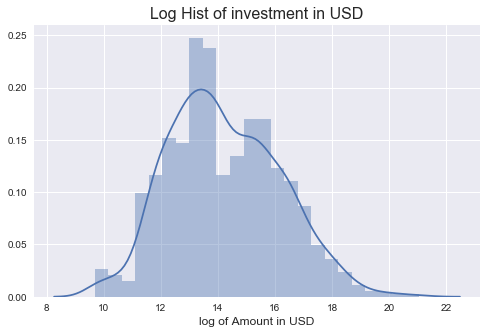

In [193]:
ds["AmountInUSD"] = ds["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
ds['AmountInUSD_log'] = np.log(ds["AmountInUSD"] + 1)
plt.figure(figsize=(8,5))
sns.distplot(ds['AmountInUSD_log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

In [230]:
ds.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,AmountInUSD_log
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,14.077876
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,13.122365
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,13.652993


<h1> Generate a random startup name based on the given data using LSTM networks <h1> 

In [285]:
data = ds['StartupName'].values
data

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Mad Street Den',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [287]:
data = '\n'.join(data)
data

'TouchKin\nEthinos\nLeverage Edu\nZepo\nClick2Clinic\nBillion Loans\nEcolibriumenergy\nDroom\nJumbotail\nMoglix\nTimesaverz\nMinjar\nMyCity4kids\nClip App\nUpwardly.in\nAutorox.co\nFabogo\nFlickstree\nDesign Cafe\nInnoviti\nVDeliver\nBottr.me\nArcatron\nQwikSpec\nChumbak\nIncreff\nVayana\nMObiquest\nAmbee\nIdeal Insurance\nHypernova Interactive\nRentomojo\nAirCTO\nPlayablo\nTrupay\nBrick2Wall\nFableStreet\nMonsoon Fintech\nMonkeyBox\nNoticeboard\nByju’s\nCreator’s Gurukul\nFab Hotels\nThinkerBell\n1mg\nJhakaas\nBigStylist\nGympik.com\nTripeur\nRentOnGo\nGoomo\nMaxMyWealth\nSpinny\nHealthbuds\nFtcash\nBHIVE Workspace\nwayForward\nGyanDhan\nHungry Foal\nZipLoan\nGrowFitter\nStratfit\nMultiplier Solutions\nABI Health\nStockal\nGuidoo\neSahai.in\nLoanmeet\nLendingKart\nBoxx.ai\nPeeSafe.in\nVista Rooms\nCoverFox\nHyperTrack\nGoodera\nDigit\nOla\nVanitycask\nMrNeeds\nMoneyTap\nGoodbox\nFincash\nPortDesk\nEdgeFx\nEazyDiner\nHealthIntel\nUnbxd\nDarwinBox\nForeverShop\nInsider.in\nFynd\nGrow Fi

In [290]:
data = data.replace(" ", "")
data = data.replace("(", "")
data = data.replace(")", "")
data = data.replace("!", "")
data = data.replace(".", "")
data = data.replace("-", "")
data = data.replace("/", "")
data = data.replace("\xa0", "")
data = data.replace("’", "")
data = data.replace("#", "")
data = data.replace("0", "")
data = data.replace("1", "")
data = data.replace("2", "")
data = data.replace("3", "")
data = data.replace("4", "")
data = data.replace("5", "")
data = data.replace("6", "")
data = data.replace("8", "")
data = data.replace("9", "")

In [291]:
data= data.lower()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (data_size, vocab_size))

There are 23288 total characters and 27 unique characters in your data.


In [292]:
char_to_ix = { ch:i for i,ch in enumerate(sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate(sorted(chars)) }
print(ix_to_char)

{0: '\n', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [314]:
example = data.split('\n')
example

['touchkin',
 'ethinos',
 'leverageedu',
 'zepo',
 'clickclinic',
 'billionloans',
 'ecolibriumenergy',
 'droom',
 'jumbotail',
 'moglix',
 'timesaverz',
 'minjar',
 'mycitykids',
 'clipapp',
 'upwardlyin',
 'autoroxco',
 'fabogo',
 'flickstree',
 'designcafe',
 'innoviti',
 'vdeliver',
 'bottrme',
 'arcatron',
 'qwikspec',
 'chumbak',
 'increff',
 'vayana',
 'mobiquest',
 'ambee',
 'idealinsurance',
 'hypernovainteractive',
 'rentomojo',
 'aircto',
 'playablo',
 'trupay',
 'brickwall',
 'fablestreet',
 'monsoonfintech',
 'monkeybox',
 'noticeboard',
 'byjus',
 'creatorsgurukul',
 'fabhotels',
 'thinkerbell',
 'mg',
 'jhakaas',
 'bigstylist',
 'gympikcom',
 'tripeur',
 'rentongo',
 'goomo',
 'maxmywealth',
 'spinny',
 'healthbuds',
 'ftcash',
 'bhiveworkspace',
 'wayforward',
 'gyandhan',
 'hungryfoal',
 'ziploan',
 'growfitter',
 'stratfit',
 'multipliersolutions',
 'abihealth',
 'stockal',
 'guidoo',
 'esahaiin',
 'loanmeet',
 'lendingkart',
 'boxxai',
 'peesafein',
 'vistarooms',
 '

In [296]:
def clip(gradients, maxValue):

    dWaa, dWax, dWya, db, dby = gradients['dWaa'], gradients['dWax'], gradients['dWya'], gradients['db'], gradients['dby']
   
    # clip to mitigate exploding gradients, loop over [dWax, dWaa, dWya, db, dby]. (≈2 lines)
    for gradient in [dWax, dWaa, dWya, db, dby]:
         np.clip(gradient, -maxValue, maxValue, out=gradient)
    
    gradients = {"dWaa": dWaa, "dWax": dWax, "dWya": dWya, "db": db, "dby": dby}
    
    return gradients

# GRADED FUNCTION: sample

def sample(parameters, char_to_ix, seed):
    
    # Retrieve parameters and relevant shapes from "parameters" dictionary
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]
    # Step 1: Create the one-hot vector x for the first character (initializing the sequence generation). (≈1 line)
    x = np.zeros((vocab_size, 1))
    # Step 1': Initialize a_prev as zeros (≈1 line)
    a_prev = np.zeros((n_a,1))
    
    # Create an empty list of indices, this is the list which will contain the list of indices of the characters to generate (≈1 line)
    indices = []
    # Idx is a flag to detect a newline character, we initialize it to -1
    idx = -1 
    
    # Loop over time-steps t. At each time-step, sample a character from a probability distribution and append 
    # its index to "indices". We'll stop if we reach 50 characters (which should be very unlikely with a well 
    # trained model), which helps debugging and prevts entering an infinite loop. 
    counter = 0
    newline_character = char_to_ix['\n']
    
    while (idx != newline_character and counter != 50):
        
        # Step 2: Forward propagate x using the equations (1), (2) and (3)
        a = np.tanh(np.dot(Wax, x) + np.dot(Waa, a_prev) + b)
        z = np.dot(Wya, a) + by
        y = softmax(z)
        
        # for grading purposes
        np.random.seed(counter+seed) 
        
        # Step 3: Sample the index of a character within the vocabulary from the probability distribution y
        idx = np.random.choice(list(range(vocab_size)), p=y.ravel())

        # Append the index to "indices"
        indices.append(idx)
        
        # Step 4: Overwrite the input character as the one corresponding to the sampled index.
        x = np.zeros((vocab_size, 1))
        x[idx] = 1
        
        # Update "a_prev" to be "a"
        a_prev = a
        
        # for grading purposes
        seed += 1
        counter +=1
        
    if (counter == 50):
        indices.append(char_to_ix['\n'])
    
    return indices

def optimize(X, Y, a_prev, parameters, learning_rate = 0.01):

    # Forward propagate through time (≈1 line)
    loss, cache = rnn_forward(X, Y, a_prev, parameters)
    
    # Backpropagate through time (≈1 line)
    gradients, a =  rnn_backward(X, Y, parameters, cache)
    
    # Clip your gradients between -5 (min) and 5 (max) (≈1 line)
    gradients = clip(gradients, 5)
    
    # Update parameters (≈1 line)
    parameters = update_parameters(parameters, gradients, learning_rate)
        
    return loss, gradients, a[len(X)-1]

In [315]:
def model(data, ix_to_char, char_to_ix, num_iterations = 35000, n_a = 50, dino_names = 7, vocab_size = 27):
    
    
    # Retrieve n_x and n_y from vocab_size
    n_x, n_y = vocab_size, vocab_size
    
    # Initialize parameters
    parameters = initialize_parameters(n_a, n_x, n_y)
    
    # Initialize loss (this is required because we want to smooth our loss, don't worry about it)
    loss = get_initial_loss(vocab_size, dino_names)
    
    # Build list of all dinosaur names (training examples).


    examples = example

    
    # Shuffle list of all dinosaur names
    np.random.seed(0)
    np.random.shuffle(examples)
    
    # Initialize the hidden state of your LSTM
    a_prev = np.zeros((n_a, 1))
    
    # Optimization loop
    for j in range(num_iterations):
                
        # Use the hint above to define one training example (X,Y) (≈ 2 lines)
        index =  j % len(examples)
        X = [None] + [char_to_ix[ch] for ch in examples[index]] 
        Y = X[1:] + [char_to_ix["\n"]]
        
        # Perform one optimization step: Forward-prop -> Backward-prop -> Clip -> Update parameters
        # Choose a learning rate of 0.01
        curr_loss, gradients, a_prev = optimize(X, Y, a_prev, parameters, learning_rate = 0.01)
                
        # Use a latency trick to keep the loss smooth. It happens here to accelerate the training.
        loss = smooth(loss, curr_loss)

        # Every 2000 Iteration, generate "n" characters thanks to sample() to check if the model is learning properly
        if j % 2000 == 0:
            
            print('Iteration: %d, Loss: %f' % (j, loss) + '\n')
            
            # The number of dinosaur names to print
            seed = 0
            for name in range(dino_names):
                
                # Sample indices and print them
                sampled_indices = sample(parameters, char_to_ix, seed)
                print_sample(sampled_indices, ix_to_char)
                
                seed += 1  # To get the same result for grading purposed, increment the seed by one. 
      
            print('\n')
        
    return parameters

In [316]:
parameters = model(data, ix_to_char, char_to_ix)

Iteration: 0, Loss: 23.090631

Nkzxwtdmfqoeyhsqwasjjjvu
Kneb
Kzxwtdmfqoeyhsqwasjjjvu
Neb
Zxwtdmfqoeyhsqwasjjjvu
Eb
Xwtdmfqoeyhsqwasjjjvu


Iteration: 2000, Loss: 28.469079

Lgyttociepmcxerms
Inb
Ixttociepmcxerms
Le
Yttociepmcxerms
Ca
Utqanbonbxerms


Iteration: 4000, Loss: 27.928990

Mfyttrandlkaxdops
Inc
Ixttrandlkaxdops
Maa
Yttrandlkaxdops
Ca
Ttrandlkaxdops


Iteration: 6000, Loss: 27.211419

Mextspaperlaydoos
Inba
Ixtspaperlaydoos
Maa
Ytspaperlaydoos
Da
Tspaperlaydoos


Iteration: 8000, Loss: 26.830668

Ngyttrbkarn
Klea
Kyttrckarm
Nda
Xustclerlay
Faadsteablunsaentie
Ustdifon


Iteration: 10000, Loss: 26.455760

Ngytspaparicuiomo
Klea
Lyustanbonax
Nea
Yustblenlay
Faafroca
Ustcogme


Iteration: 12000, Loss: 26.381729

Nextss
Inda
Jvprockarnbybons
Ndaaestacamvetcanticay
Zutsandmeculons
Eaadstacamvetcanticay
Votdidonculons


Iteration: 14000, Loss: 26.040242

Mexvos
Inda
Jvowpap
Mabacor
Zutsancon
Eaadsta
Voudjengat


Iteration: 16000, Loss: 25.867943

Mexttramann
Inda
Juvtralanicx
Mabac

<h3> Initially the names make no sense but as as the iteration increases we see some probable company names <h3>
<ul>
<li>Mabacora </li> <br>
<li>  Votbigo</li><br>
<li>Zystcleri</li><br>
<li>Feagora</li><br>
<li>Inda</li><br>
<li>Voreedom</li><br>
<li>Mevstock and so on....</li>
 
<h2> Thank you



